
# Modelo de Lotka y Volterra para el sistema de sueño REM 


Este modelo está formado por dos edo's no lineales que constituyen un modelo simplificado de la interacción de dos poblaciones de neuronas, involucradas en el sistema de sueño REM, una de las cuales es un predador y la otra una presa. Las variables $x$ e $y$ representan respectivamnete, el número de individuos de la población de neuronas FTG activas y de la población de neuronas LC activas, respectivamente, que depende del tiempo $t$. Estas son las ecuaciones:

\begin{align}
 \frac{dx}{dt} &= ax-cxy\\
 \frac{dy}{dt} &= -dy+xy
\end{align}


Aquí las constantes $a$, $b,$ $c$ y $d$ son parámetros reales positivos. 



1. Solución numérica del PVI (para valores concretos de los parámetros)
2. Gráficas de la actividad neuronal como funciones del tiempo y de órbitas (para valores concretos de los parámetros)
3. Representar campo de direcciones y óbitas: plano de fases (para valores concretos de los parámetros)
4. Representar puntos de equilibrio en el plano de fases (para valores concretos de los parámetros)
5. Estabilidad de los punto de equilibrio del sistema: estudio cualitativo del caso general (valores arbitrarios de los parámetros del sistema)

Cargamos los módulos necesarios: numérico, gráficos, integración numérica y lenguaje matemático

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
import sympy as sp
sp.init_printing()

La función que define este sistema es 

$$
F(x,y) = (ax-bxy,-cy+dxy)
$$


### 1. Solución numérica del PVI

In [2]:
# Introducimos los valores de las constantes
a,b,c,d = 0.3029,0.3029,0.15145,0.15145

# La función 'F' del sistema y el vector 'P' que se compone de las funciones desconocidas 'x(t)', 'y(t)'
def F(P, t):
    return [a*P[0] - b*P[0]*P[1], -c*P[1] + d*P[0]*P[1]]

# Damos 500 valores a la variable independiente 't' entre 0 y  100
tiempo = np.linspace(0, 100, 500)

# Condición inicial
P0 = [1.0, 4.5]

# Obtenemos la resolución numérica del sistema en forma de matriz 'Ps' con una columna para los valores de cada población. 
Ps = scint.odeint(F, P0, tiempo)

# Valores obtenidos de la población de células FTG en la primera columna 
FTG = Ps[:,0]

# Valores obtenidos de la población de células FC en la segunda
LC = Ps[:,1]

### 2. Gráficas de poblaciones como funciones del tiempo y de órbitas

Dibujamos ambas gráficas de la evolución de cada población respecto del tiempo en los instantes indicados

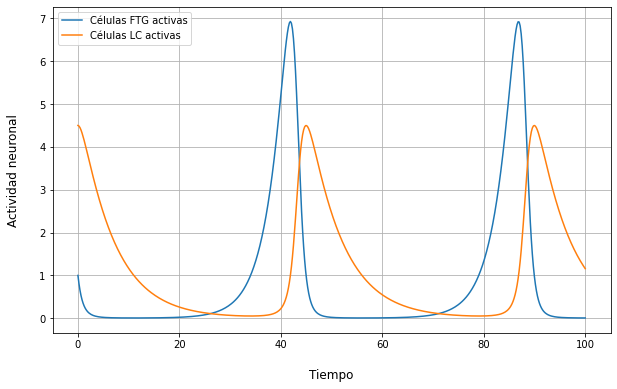

In [3]:
plt.figure(figsize = (10,6))
plt.plot(tiempo, FTG, label="Células FTG activas")
plt.plot(tiempo, LC, label="Células LC activas")
plt.xlabel("\nTiempo", fontsize=12)
plt.ylabel("Actividad neuronal\n", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

Dibujamos la gráfica de la trayectoria en el plano de fases

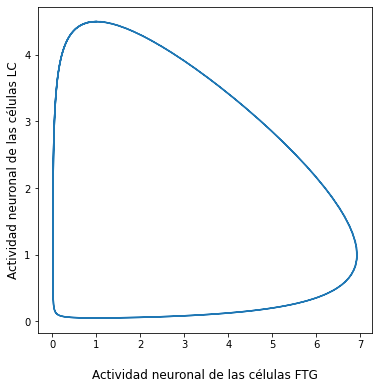

In [4]:
plt.figure(figsize =(6,6))
plt.plot(FTG, LC, "-")
plt.xlabel("\nActividad neuronal de las células FTG", fontsize=12)
plt.ylabel("Actividad neuronal de las células LC", fontsize=12)
plt.show()

Podemos ver el comportamiento periódico de ambas poblaciones y su forma de interaccionar. 
Vamos a dibujar varias soluciones particulares en el mismo plano.

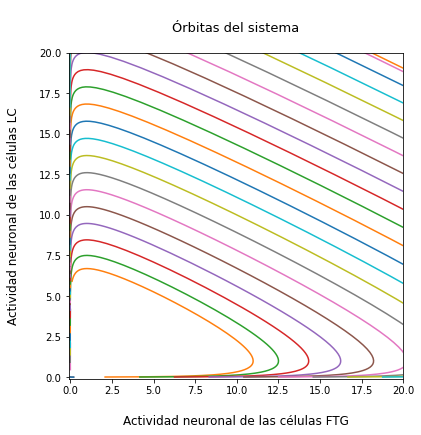

In [5]:
plt.figure(figsize=(6,6))
tiempo = np.linspace(0, 10, 200)
ic = np.linspace(0.01, 50, 25)
for r in ic:
    P0 = [r, 50]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
for s in ic:
    P0 = [0.01, s]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
for r in ic:
    P0 = [r, 0.01]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
for s in ic:
    P0 = [50, s]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")

plt.xlim(-0.1, 20)
plt.ylim(-0.1, 20)

plt.xlabel("\nActividad neuronal de las células FTG", fontsize=12)
plt.ylabel("Actividad neuronal de las células LC\n", fontsize=12)
plt.title("\nÓrbitas del sistema\n", fontsize=13)

plt.show()

### 3. Campo de direcciones y órbitas: plano de fases 

Vamos representar estas soluciones en el plano de fases junto con el campo de direcciones de forma que los vectores tengan la misma longitud. Primero definimos un campo unitario en la dirección del campo asociado al sistema. Después controlamos la longitud con la opcioón `scale` del comando `quiver`.

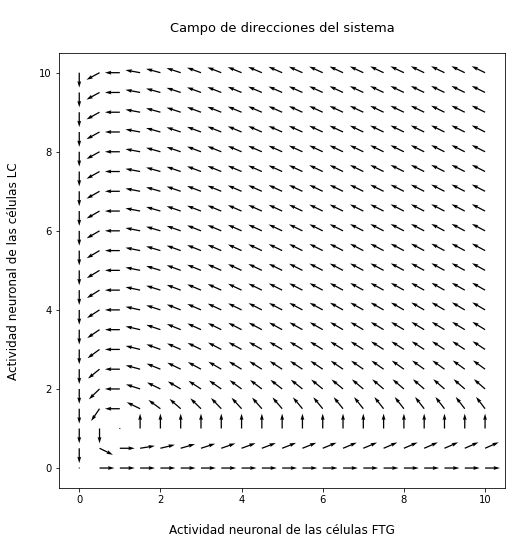

In [6]:
# Malla rectangular de puntos
X, Y = np.meshgrid(np.linspace(0, 10, 21),  np.linspace(0, 10, 21))

# Componentes del vector de dirección 
U = a*X-b*X*Y
V = -c*Y+d*X*Y

# Definimos un campo de vectores unitario salvo cuando se anula
modulo2 = U**2 + V**2
D1 = np.ones([21, 21])
D2 = np.ones([21, 21])
for i in range(21):
    for j in range(21):
        if modulo2[i, j] == 0:
            D1[i, j] = 0
            D2[i, j] = 0
        else:
            D1[i, j] = U[i, j]/np.sqrt(modulo2[i, j])
            D2[i, j] = V[i, j]/np.sqrt(modulo2[i, j])

# Fgura cuadrada
plt.figure(figsize = (8,8))

# Representamos el campo de direcciones en el plano
plt.quiver(X, Y, D1, D2, angles = 'xy', scale = 30, headwidth = 3)

plt.xlabel("\nActividad neuronal de las células FTG", fontsize=12)
plt.ylabel("Actividad neuronal de las células LC\n", fontsize=12)
plt.title("\nCampo de direcciones del sistema\n", fontsize=13)

plt.show()

Campo de direcciones con una curva solución

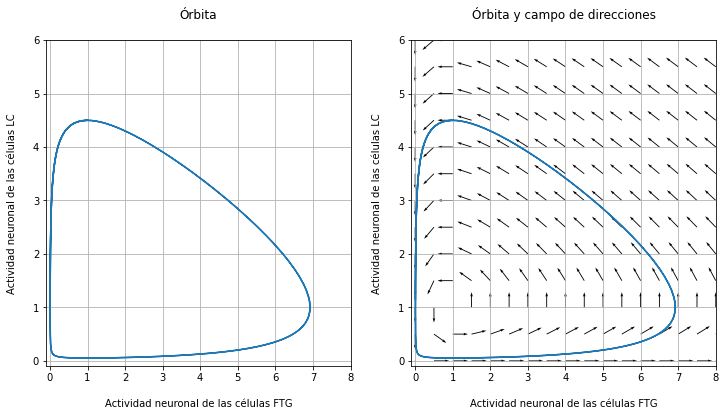

In [7]:
fig = plt.figure(figsize = (12,6))

ejes1 = fig.add_subplot(1,2,1)
ejes1.plot(FTG, LC, "-")
ejes1.set_title("Órbita\n")
ejes1.set_xlabel("\nActividad neuronal de las células FTG")
ejes1.set_ylabel("Actividad neuronal de las células LC\n")
ejes1.set_xlim(-0.1, 8)
ejes1.set_ylim(-0.1, 6)
plt.grid(True)

ejes2 = fig.add_subplot(1,2,2)

X, Y = np.meshgrid(np.linspace(0, 10, 21),  np.linspace(0, 10, 21))
U = a*X-b*X*Y
V = -c*Y+d*X*Y
modulo2 = U**2 + V**2
D1 = np.ones([21, 21])
D2 = np.ones([21, 21])
for i in range(21):
    for j in range(21):
        if modulo2[i, j] == 0:
            D1[i, j] = 0
            D2[i, j] = 0
        else:
            D1[i, j] = U[i, j]/np.sqrt(modulo2[i, j])
            D2[i, j] = V[i, j]/np.sqrt(modulo2[i, j])

ejes2.quiver(X, Y, D1, D2, angles = 'xy', scale = 20, headwidth = 3)
ejes2.plot(FTG, LC, "-")
ejes2.set_title("Órbita y campo de direcciones\n")
ejes2.set_xlabel("\nActividad neuronal de las células FTG")
ejes2.set_ylabel("Actividad neuronal de las células LC\n")
ejes2.set_xlim(-0.1, 8)
ejes2.set_ylim(-0.1, 6)
plt.grid(True)

plt.show()

Plano de fases: órbitas y campo de direcciones

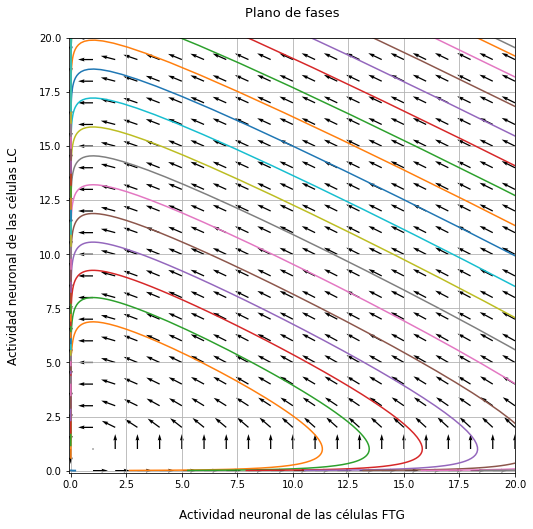

In [8]:
# Fgura cuadrada
plt.figure(figsize = (8,8))

# Representamos el campo de direcciones en el plano
X, Y = np.meshgrid(np.linspace(0, 20, 21),  np.linspace(0, 20, 21))
U = a*X-b*X*Y
V = -c*Y+d*X*Y
modulo2 = U**2 + V**2
D1 = np.ones([21, 21])
D2 = np.ones([21, 21])
for i in range(21):
    for j in range(21):
        if modulo2[i, j] == 0:
            D1[i, j] = 0
            D2[i, j] = 0
        else:
            D1[i, j] = U[i, j]/np.sqrt(modulo2[i, j])
            D2[i, j] = V[i, j]/np.sqrt(modulo2[i, j])
plt.quiver(X, Y, D1, D2, angles = 'xy', scale = 30)

# Representamos varias soluciones del sistema
tiempo = np.linspace(0, 10, 200)
ic = np.linspace(0.01, 50, 20)
for r in ic:
    P0 = [r, 50]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
for s in ic:
    P0 = [0.01, s]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
for r in ic:
    P0 = [r, 0.01]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
for s in ic:
    P0 = [50, s]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")

plt.xlim(-0.1, 20)
plt.ylim(-0.1, 20)

plt.xlabel("\nActividad neuronal de las células FTG", fontsize=12)
plt.ylabel("Actividad neuronal de las células LC\n", fontsize=12)
plt.title("Plano de fases\n", fontsize=13)

plt.grid(True)
plt.show()

### 4. Puntos críticos y soluciones de equilibrio

Dado un sistema de edo's 

\begin{align}
 \frac{dx}{dt} &= F(x, y) \\
 \frac{dy}{dt} &= G(x, y)
\end{align}

los puntos críticos son los que hacen cero ambas derivadas, es decir, las soluciones del sistema de ecuaciones algebraicas

\begin{align}
 F(x, y) = 0\\
 G(x, y) = 0
\end{align}

Las soluciones de equilibrio corresponden a soluciones constantes: son aquellas que verifican que en todo instante el sistema está en el punto crítico. Si $(x_p, y_p)$ es un punto crítico, una solución de equilibrio será 

$$
x(t)\equiv x_p, \qquad\qquad y(t)\equiv y_p.
$$

Cargamos el módulo `sympy` e introducimos los símbolos necesarios, así como las expresiones de las ecuaciones que tenemos que resolver.

In [9]:
# Cargamos el módulo 'sympy'
import sympy as sp

# Declaramos los símbolos que vamos a utilizar
# Nombramos a las constantes así para que no interfieran con las variables a, b, c y d antes definidas
x, y, a_s, b_s, c_s, d_s = sp.symbols('x , y, a_s, b_s, c_s, d_s')

# Nombramos a ambas partes de la derecha de las ecuaciones del sistema
f_ = a_s*x-b_s*x*y
g_ = -c_s*y+d_s*x*y

Sustituimos los valores de los parámetros y obtenemos la solución del sistema

In [11]:
pts_criticos = sp.solve([f_.subs({a_s:0.3029, b_s:0.3029}), g_.subs({c_s:0.15145, d_s:0.15145})], (x, y))
pts_criticos

Podemos ahora dibujar los puntos críticos en el plano de fases con el comando `scatter`. 
Del anterior código sólo es necesaria la parte que genera la figura y le añadimos las correspondientes líneas. Los valores de las variables todavía están guardados en la memoria. 

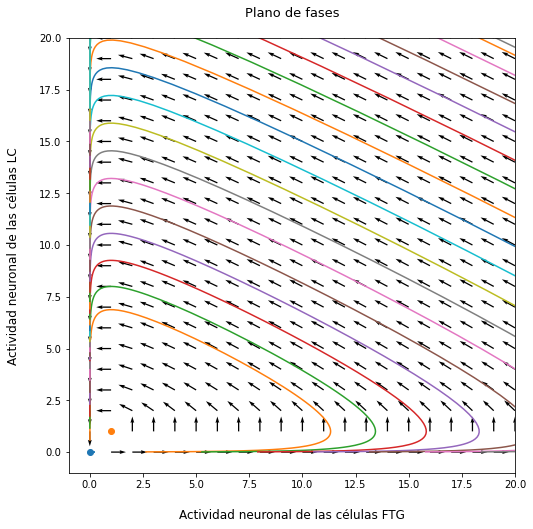

In [12]:
# Fgura cuadrada
plt.figure(figsize = (8,8))

# Representamos el campo
plt.quiver(X, Y, D1, D2, scale = 30)

# Representamos los puntos críticos
plt.scatter(pts_criticos[0][0], pts_criticos[0][1])
plt.scatter(pts_criticos[1][0], pts_criticos[1][1])

# Representamos varias soluciones del sistema
tiempo = np.linspace(0, 10, 200)
ic = np.linspace(0.01, 50, 20)
for r in ic:
    P0 = [r, 50]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
for s in ic:
    P0 = [0.01, s]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
for r in ic:
    P0 = [r, 0.01]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
for s in ic:
    P0 = [50, s]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")

plt.xlim(-1, 20)
plt.ylim(-1, 20)

plt.xlabel("\nActividad neuronal de las células FTG", fontsize=12)
plt.ylabel("Actividad neuronal de las células LC\n", fontsize=12)
plt.title("Plano de fases\n", fontsize=13)

plt.show()

### 5. Estabilidad de los puntos de equilibrio

#### Puntos críticos

In [14]:
x, y = sp.symbols('x y')
a, b, c, d = sp.symbols('a b c d', positive = True)
f = a*x - b*x*y
g = -c*y + d*x*y
f, g

In [15]:
pts_criticos = sp.solve([f,g], [x,y])
pts_criticos

#### Matriz Jacobiana

In [16]:
C = sp.Matrix([[f.diff(x), f.diff(y)],[g.diff(x), g.diff(y)]])
C

⎡a - b⋅y    -b⋅x  ⎤
⎢                 ⎥
⎣  d⋅y    -c + d⋅x⎦

#### Punto $(0,0)$

In [17]:
p1 = pts_criticos[0]
p1

In [18]:
C1 = C.subs({x:p1[0], y:p1[0]})
C1

⎡a  0 ⎤
⎢     ⎥
⎣0  -c⎦

In [19]:
tr1 = sp.trace(C1)
sp.simplify(tr1)

In [20]:
det1 = sp.det(C1)
sp.simplify(det1)

In [21]:
autovalores1 = C1.eigenvals()
autovalores1

Dado que $a$ y $c$ son positivos, se trata de un punto hipérbólico, por lo tanto inestable. La variedad estable es el eje vertical y la inestable es el horizontal.

In [22]:
autovectores1 = C1.eigenvects()
autovectores1

⎡⎛      ⎡⎡1⎤⎤⎞  ⎛       ⎡⎡0⎤⎤⎞⎤
⎢⎜a, 1, ⎢⎢ ⎥⎥⎟, ⎜-c, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠  ⎝       ⎣⎣1⎦⎦⎠⎦

Aquí tenemos, el autovalor, su multiplicidad y su autovector, de la matriz.

#### Punto $\left(\frac{c}{d},\frac{a}{b}\right)$

In [23]:
p2 = pts_criticos[1] 
p2

In [24]:
C2 = C.subs({x:p2[0], y:p2[1]})
C2

⎡     -b⋅c ⎤
⎢ 0   ─────⎥
⎢       d  ⎥
⎢          ⎥
⎢a⋅d       ⎥
⎢───    0  ⎥
⎣ b        ⎦

In [25]:
tr2 = sp.trace(C2)
sp.simplify(tr2)

In [26]:
det2 = sp.det(C2)
sp.simplify(det2)

In [27]:
autovalores2 = C2.eigenvals()
autovalores2

Ambos autovalores son imaginarios puros. Por lo tanto, este punto de equilibrio es un centro y es estable.

In [28]:
autovectores2 = C2.eigenvects()
autovectores2

⎡⎛             ⎡⎡-ⅈ⋅b⋅√c ⎤⎤⎞  ⎛            ⎡⎡ⅈ⋅b⋅√c⎤⎤⎞⎤
⎢⎜             ⎢⎢────────⎥⎥⎟  ⎜            ⎢⎢──────⎥⎥⎟⎥
⎢⎜-ⅈ⋅√a⋅√c, 1, ⎢⎢  √a⋅d  ⎥⎥⎟, ⎜ⅈ⋅√a⋅√c, 1, ⎢⎢ √a⋅d ⎥⎥⎟⎥
⎢⎜             ⎢⎢        ⎥⎥⎟  ⎜            ⎢⎢      ⎥⎥⎟⎥
⎣⎝             ⎣⎣   1    ⎦⎦⎠  ⎝            ⎣⎣  1   ⎦⎦⎠⎦

La traza de la matriz es nula y, dado que $a$ y $c$ son estrictamente positivos, deducimos que el determinante de la matriz es positivo. Por lo tanto, deducimos que el sistema en el segundo punto crítico es estable.